In [3]:
import pandas as pd
db = pd.read_csv("contracts.csv")

In [4]:
db["year_signed"].unique()

array([2023, 2022, 2021, 2024, 2020, 2025, 1997, 2005, 2018, 1999, 2019,
       1995, 2013, 2004, 2001, 2012, 2017, 2016, 1996, 1998, 2015, 2011,
       2014, 2010, 2000, 2009, 2008, 2002, 1994, 2007, 2006, 2003,    0,
       1993, 1991, 1983, 1985, 1986, 1989, 1987, 1990, 1988, 1992])

In [5]:
db.columns

Index(['player', 'position', 'team', 'is_active', 'year_signed', 'years',
       'value', 'apy', 'guaranteed', 'apy_cap_pct', 'inflated_value',
       'inflated_apy', 'inflated_guaranteed', 'player_page', 'otc_id',
       'gsis_id', 'date_of_birth', 'height', 'weight', 'college', 'draft_year',
       'draft_round', 'draft_overall', 'draft_team', 'cols'],
      dtype='object')

In [6]:
db.info

<bound method DataFrame.info of                    player position        team  is_active  year_signed  years  \
0              Joe Burrow       QB     Bengals       True         2023    5.0   
1           Aaron Rodgers       QB      GB/NYJ      False         2022    5.0   
2              Josh Allen       QB       Bills      False         2021    6.0   
3          Russell Wilson       QB     Broncos      False         2022    5.0   
4            Dak Prescott       QB     Cowboys       True         2024    4.0   
...                   ...      ...         ...        ...          ...    ...   
47804          Jorgen Hus       LS      Chiefs      False            0    2.0   
47805     Trevor Gillette       LS     Jaguars      False            0    4.0   
47806          Nate Boyer       LS    Seahawks      False            0    3.0   
47807  Courtland Clavette       LS  Buccaneers      False            0    3.0   
47808     Kevin McDermott       LS       49ers      False         2013    3.0

In [7]:
db[db["player"] == "Derrick Brown"]

,player,position,team,is_active,year_signed,years,value,apy,guaranteed,apy_cap_pct,...,gsis_id,date_of_birth,height,weight,college,draft_year,draft_round,draft_overall,draft_team,cols
24005,Derrick Brown,IDL,Panthers,True,2024,4.0,96.000000,24.000000,41.165000,0.094,...,00-0036220,NaN,"6'5""",318.0,Auburn,2020.0,1.0,7.0,Panthers,NaN
24245,Derrick Brown,IDL,Panthers,False,2020,4.0,23.621404,5.905351,23.621404,0.030,...,00-0036220,NaN,"6'5""",318.0,Auburn,2020.0,1.0,7.0,Panthers,NaN


In [8]:
db.describe

<bound method NDFrame.describe of                    player position        team  is_active  year_signed  years  \
0              Joe Burrow       QB     Bengals       True         2023    5.0   
1           Aaron Rodgers       QB      GB/NYJ      False         2022    5.0   
2              Josh Allen       QB       Bills      False         2021    6.0   
3          Russell Wilson       QB     Broncos      False         2022    5.0   
4            Dak Prescott       QB     Cowboys       True         2024    4.0   
...                   ...      ...         ...        ...          ...    ...   
47804          Jorgen Hus       LS      Chiefs      False            0    2.0   
47805     Trevor Gillette       LS     Jaguars      False            0    4.0   
47806          Nate Boyer       LS    Seahawks      False            0    3.0   
47807  Courtland Clavette       LS  Buccaneers      False            0    3.0   
47808     Kevin McDermott       LS       49ers      False         2013    3

In [9]:
active_contracts = db[(db["is_active"] == True)]

In [10]:
active_contracts.head()

,player,position,team,is_active,year_signed,years,value,apy,guaranteed,apy_cap_pct,...,gsis_id,date_of_birth,height,weight,college,draft_year,draft_round,draft_overall,draft_team,cols
0,Joe Burrow,QB,Bengals,True,2023,5.0,275.0,55.0,146.510000,0.245,...,00-0036442,NaN,"6'4""",215.0,LSU,2020.0,1.0,1.0,Bengals,NaN
4,Dak Prescott,QB,Cowboys,True,2024,4.0,240.0,60.0,129.000000,0.235,...,00-0033077,NaN,"6'2""",226.0,Mississippi State,2016.0,4.0,135.0,Cowboys,NaN
5,Justin Herbert,QB,Chargers,True,2023,5.0,262.5,52.5,133.738375,0.234,...,00-0036355,NaN,"6'6""",237.0,Oregon,2020.0,1.0,6.0,Chargers,NaN
6,Lamar Jackson,QB,Ravens,True,2023,5.0,260.0,52.0,135.000000,0.231,...,00-0034796,NaN,"6'3""",200.0,Louisville,2018.0,1.0,32.0,Ravens,NaN
7,Patrick Mahomes,QB,Chiefs,True,2020,10.0,450.0,45.0,63.081905,0.227,...,00-0033873,NaN,"6'2""",225.0,Texas Tech,2017.0,1.0,10.0,Chiefs,NaN


In [11]:
import matplotlib.pyplot as plt

In [16]:
avg_apy_by_pos = (active_contracts.groupby("position")["apy"].mean() * 1_000_000).sort_values(ascending=False)

In [17]:
print(avg_apy_by_pos)

position
QB     1.083498e+07
LT     5.024869e+06
ED     4.905861e+06
RT     4.317939e+06
RG     4.187744e+06
IDL    4.137419e+06
WR     3.894006e+06
LG     3.495030e+06
CB     3.199026e+06
S      3.102759e+06
LB     2.846446e+06
TE     2.820450e+06
C      2.775212e+06
K      2.676917e+06
RB     2.315260e+06
P      2.042377e+06
FB     1.993074e+06
LS     1.230804e+06
Name: apy, dtype: float64


In [18]:
from matplotlib.ticker import StrMethodFormatter

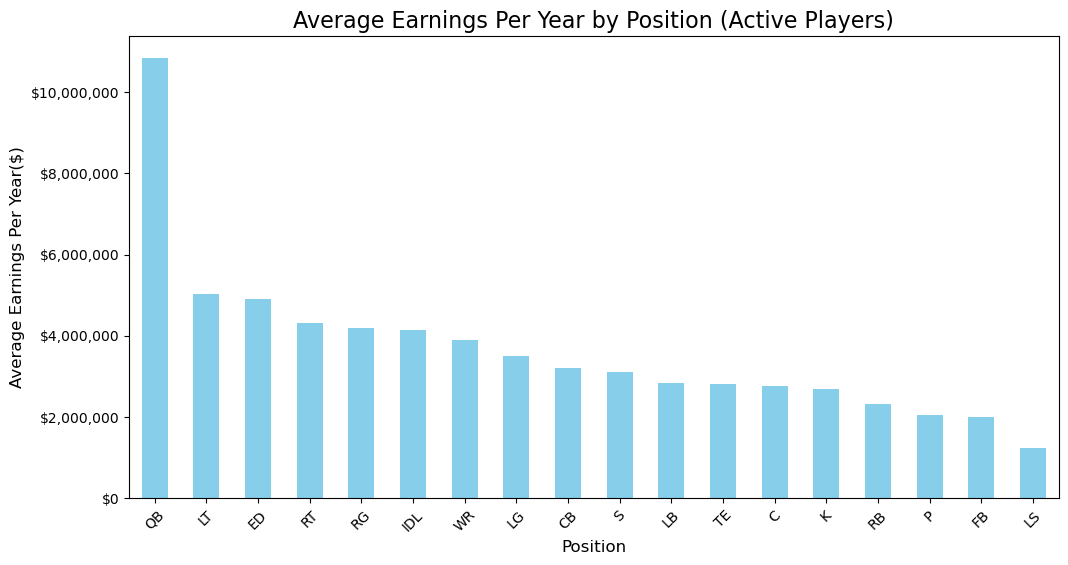

In [19]:
plt.figure(figsize=(12,6))
ax = avg_apy_by_pos.plot(kind="bar", color="skyblue")

plt.title("Average Earnings Per Year by Position (Active Players)", fontsize=16)
plt.xlabel("Position", fontsize=12)
plt.ylabel("Average Earnings Per Year($)", fontsize=12)
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

In [20]:
db.columns

Index(['player', 'position', 'team', 'is_active', 'year_signed', 'years',
       'value', 'apy', 'guaranteed', 'apy_cap_pct', 'inflated_value',
       'inflated_apy', 'inflated_guaranteed', 'player_page', 'otc_id',
       'gsis_id', 'date_of_birth', 'height', 'weight', 'college', 'draft_year',
       'draft_round', 'draft_overall', 'draft_team', 'cols'],
      dtype='object')

In [21]:
qb_contracts = db[db["position"] == "QB"]

In [22]:
qb_contracts = db[(db["position"] == "QB") & (db["year_signed"] > 1993)]
qb_over_time = qb_contracts.groupby("year_signed")["apy_cap_pct"].median().reset_index()

(array([1990., 1995., 2000., 2005., 2010., 2015., 2020., 2025., 2030.]),
 [Text(1990.0, 0, '1990'),
  Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015'),
  Text(2020.0, 0, '2020'),
  Text(2025.0, 0, '2025'),
  Text(2030.0, 0, '2030')])

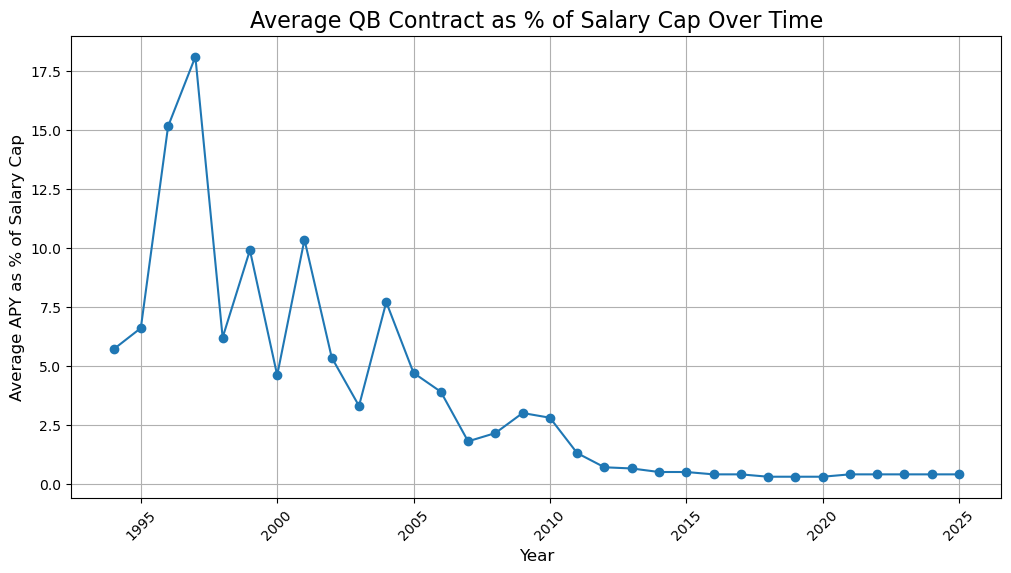

In [23]:
plt.figure(figsize=(12,6))
plt.plot(qb_over_time["year_signed"], qb_over_time["apy_cap_pct"] * 100, marker='o')
plt.title("Average QB Contract as % of Salary Cap Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average APY as % of Salary Cap", fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)

In [24]:
db.columns

Index(['player', 'position', 'team', 'is_active', 'year_signed', 'years',
       'value', 'apy', 'guaranteed', 'apy_cap_pct', 'inflated_value',
       'inflated_apy', 'inflated_guaranteed', 'player_page', 'otc_id',
       'gsis_id', 'date_of_birth', 'height', 'weight', 'college', 'draft_year',
       'draft_round', 'draft_overall', 'draft_team', 'cols'],
      dtype='object')

In [26]:
panthers = db[db["team"] == "Panthers"]

In [27]:
panthers.head()

,player,position,team,is_active,year_signed,years,value,apy,guaranteed,apy_cap_pct,...,gsis_id,date_of_birth,height,weight,college,draft_year,draft_round,draft_overall,draft_team,cols
66,Cam Newton,QB,Panthers,False,2015,5.0,103.800000,20.760000,41.000000,0.145,...,00-0027939,"May 11, 1989","6'5""",245.0,Auburn,2011.0,1.0,1.0,Panthers,NaN
124,Teddy Bridgewater,QB,Panthers,False,2020,3.0,63.000000,21.000000,33.000000,0.106,...,00-0031237,NaN,"6'2""",214.0,Louisville,2014.0,1.0,32.0,Vikings,NaN
210,Cam Newton,QB,Panthers,False,2011,4.0,22.025498,5.506375,22.025498,0.046,...,00-0027939,"May 11, 1989","6'5""",245.0,Auburn,2011.0,1.0,1.0,Panthers,NaN
212,Cam Newton,QB,Panthers,False,2021,1.0,8.250000,8.250000,4.500000,0.045,...,00-0027939,"May 11, 1989","6'5""",245.0,Auburn,2011.0,1.0,1.0,Panthers,NaN
225,Bryce Young,QB,Panthers,True,2023,4.0,37.955074,9.488769,37.955074,0.042,...,00-0039150,NaN,"5'10""",204.0,Alabama,2023.0,1.0,1.0,Panthers,NaN


In [28]:
panthers = panthers.drop_duplicates(subset=['player'], keep='last')


In [29]:
panthers.head()

,player,position,team,is_active,year_signed,years,value,apy,guaranteed,apy_cap_pct,...,gsis_id,date_of_birth,height,weight,college,draft_year,draft_round,draft_overall,draft_team,cols
124,Teddy Bridgewater,QB,Panthers,False,2020,3.0,63.000000,21.000000,33.000000,0.106,...,00-0031237,NaN,"6'2""",214.0,Louisville,2014.0,1.0,32.0,Vikings,NaN
212,Cam Newton,QB,Panthers,False,2021,1.0,8.250000,8.250000,4.500000,0.045,...,00-0027939,"May 11, 1989","6'5""",245.0,Auburn,2011.0,1.0,1.0,Panthers,NaN
225,Bryce Young,QB,Panthers,True,2023,4.0,37.955074,9.488769,37.955074,0.042,...,00-0039150,NaN,"5'10""",204.0,Alabama,2023.0,1.0,1.0,Panthers,NaN
281,David Carr,QB,Panthers,False,2007,2.0,6.200000,3.100000,3.000000,0.028,...,00-0020608,"July 21, 1979","6'3""",212.0,Fresno St.,2002.0,1.0,1.0,Texans,NaN
315,Matt Moore,QB,Panthers,False,2010,1.0,3.043000,3.043000,0.000000,0.024,...,00-0025708,"August 9, 1984","6'3""",216.0,Oregon State,2007.0,NaN,NaN,Cowboys,NaN


In [45]:
college_counts = panthers['college'].value_counts()
college_counts = college_counts[college_counts > 4]

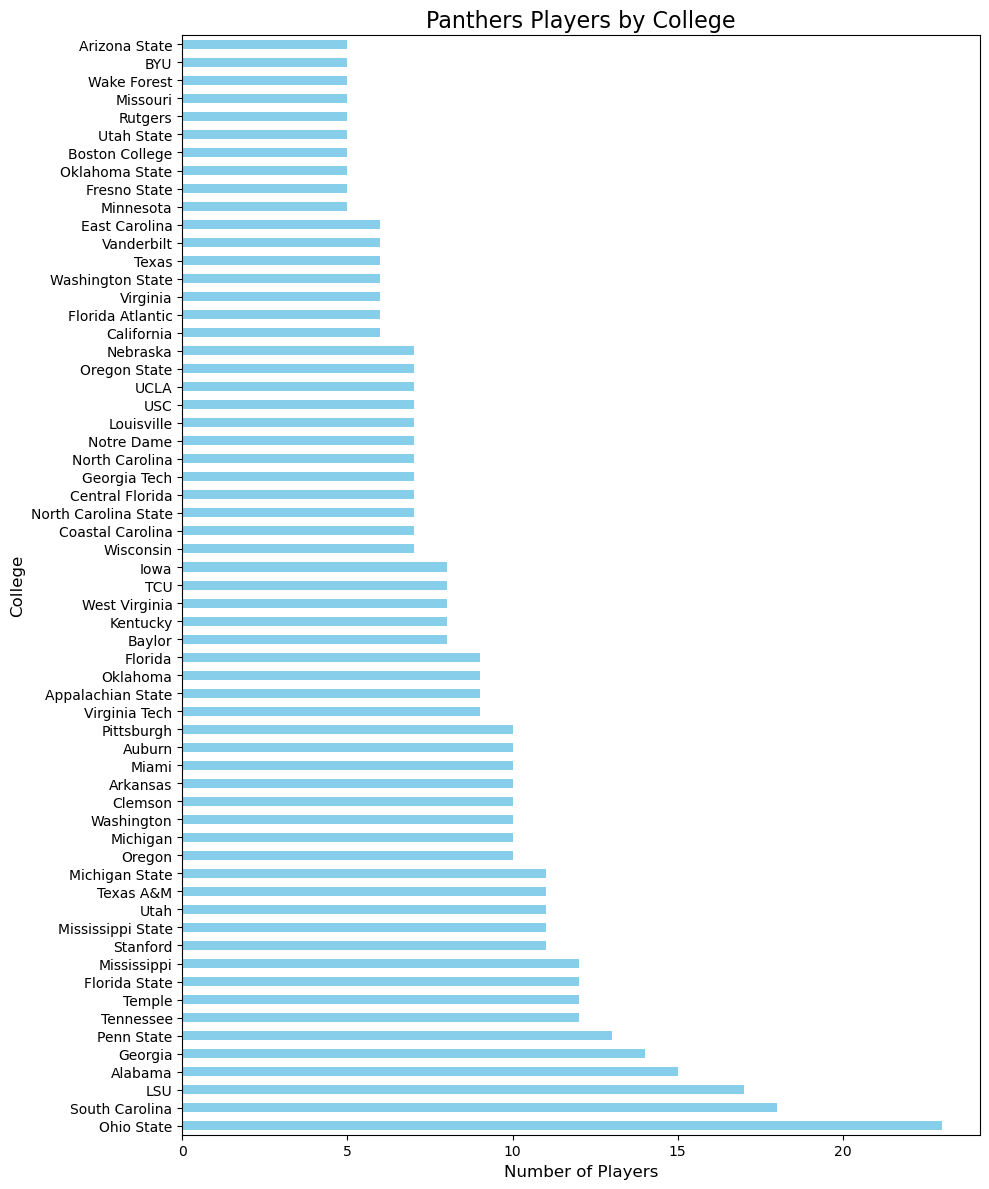

In [48]:
plt.figure(figsize=(10,12))
college_counts.plot(kind="barh", color="skyblue")

plt.title("Panthers Players by College", fontsize=16)
plt.xlabel("Number of Players", fontsize=12)
plt.ylabel("College", fontsize=12)
plt.tight_layout()
plt.show()

In [50]:
osu_players = panthers[panthers["college"] == "Ohio State"]

In [51]:
osu_players

,player,position,team,is_active,year_signed,years,value,apy,guaranteed,apy_cap_pct,...,gsis_id,date_of_birth,height,weight,college,draft_year,draft_round,draft_overall,draft_team,cols
2623,Rod Smith,RB,Panthers,False,2021,1.0,0.990000,0.990000,0.000000,0.005,...,00-0031900,"January 10, 1992","6'3""",231.0,Ohio State,2015.0,NaN,NaN,Seahawks,NaN
6627,Curtis Samuel,WR,Panthers,False,2017,4.0,6.453660,1.613415,4.056920,0.010,...,00-0033282,NaN,"5'11""",196.0,Ohio State,2017.0,2.0,40.0,Panthers,NaN
6656,Ted Ginn,WR,Panthers,False,2013,1.0,1.100000,1.100000,0.300000,0.009,...,00-0025396,"April 12, 1985","5'11""",185.0,Ohio State,2007.0,1.0,9.0,Dolphins,NaN
10684,Devin Smith,WR,Panthers,False,2021,1.0,0.252000,0.252000,0.000000,0.001,...,NaN,"March 3, 1992","6'0""",196.0,Ohio State,2015.0,2.0,37.0,Jets,NaN
11643,C.J. Saunders,WR,Panthers,False,2021,1.0,0.165600,0.165600,0.000000,0.001,...,00-0036910,"September 15, 1996","5'10""",190.0,Ohio State,2021.0,NaN,NaN,Panthers,NaN
11755,Praise Olatoke,WR,Panthers,False,2024,1.0,0.225000,0.225000,0.000000,0.001,...,00-0039914,"June 23, 2000","6'2""",197.0,Ohio State,2024.0,NaN,NaN,Chargers,NaN
12461,Braxton Miller,WR,Panthers,False,2019,1.0,0.136000,0.136000,0.000000,0.001,...,00-0033069,"May 26, 1992","6'1""",201.0,Ohio State,2016.0,3.0,85.0,Texans,NaN
14918,Marcus Baugh,TE,Panthers,False,2019,1.0,0.500000,0.500000,0.005000,0.003,...,00-0034169,"December 4, 1994","6'4""",247.0,Ohio State,2018.0,NaN,NaN,Raiders,NaN
15987,Ben Hartsock,TE,Panthers,False,0,1.0,0.905000,0.905000,0.065000,0.000,...,00-0022847,"July 5, 1980","6'4""",270.0,Ohio State,2004.0,3.0,68.0,Colts,NaN
18325,Andrew Norwell,LG,Panthers,False,2014,3.0,1.542000,0.514000,0.012000,0.004,...,00-0031122,"October 25, 1991",NaN,NaN,Ohio State,2014.0,NaN,NaN,Panthers,NaN


In [53]:
drafted_by_panthers = panthers[panthers["draft_team"] == "Panthers"]

In [65]:
db_college_counts = drafted_by_panthers['college'].value_counts()
db_college_counts = db_college_counts[db_college_counts >= 2]

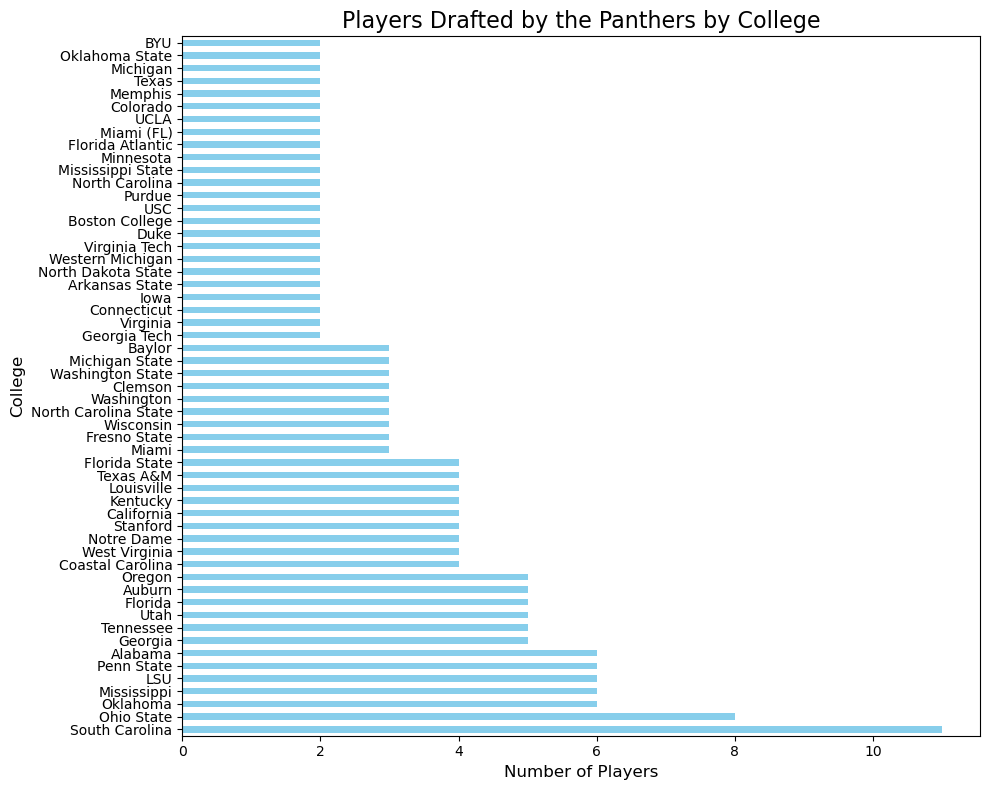

In [66]:
plt.figure(figsize=(10,8))
db_college_counts.plot(kind="barh", color="skyblue")

plt.title("Players Drafted by the Panthers by College", fontsize=16)
plt.xlabel("Number of Players", fontsize=12)
plt.ylabel("College", fontsize=12)
plt.tight_layout()
plt.show()

In [67]:
active_panther_contracts = panthers[panthers["is_active"] == True]

In [68]:
active_panther_contracts

,player,position,team,is_active,year_signed,years,value,apy,guaranteed,apy_cap_pct,...,gsis_id,date_of_birth,height,weight,college,draft_year,draft_round,draft_overall,draft_team,cols
225,Bryce Young,QB,Panthers,True,2023,4.0,37.955074,9.488769,37.955074,0.042,...,00-0039150,NaN,"5'10""",204.0,Alabama,2023.0,1.0,1.0,Panthers,NaN
407,Andy Dalton,QB,Panthers,True,2025,2.0,8.000000,4.000000,6.000000,0.014,...,00-0027973,NaN,"6'2""",220.0,TCU,2011.0,2.0,35.0,Bengals,NaN
1805,Hendon Hooker,QB,Panthers,True,2025,1.0,0.234000,0.234000,0.000000,0.001,...,00-0038550,NaN,"6'3""",217.0,Tennessee,2023.0,3.0,68.0,Lions,NaN
2364,Rico Dowdle,RB,Panthers,True,2025,1.0,2.750000,2.750000,2.750000,0.010,...,00-0036139,NaN,"5'11""",195.0,South Carolina,2020.0,NaN,NaN,Cowboys,NaN
2410,Jonathon Brooks,RB,Panthers,True,2024,4.0,8.417082,2.104271,6.240268,0.008,...,00-0039344,NaN,"6'0""",207.0,Texas,2024.0,2.0,46.0,Panthers,NaN
2891,Trevor Etienne,RB,Panthers,True,2025,4.0,5.208744,1.302186,1.008744,0.005,...,00-0040644,NaN,"5'9""",205.0,Georgia,2025.0,4.0,114.0,Panthers,NaN
4650,DeeJay Dallas,RB,Panthers,True,2025,1.0,0.315000,0.315000,0.000000,0.001,...,00-0036425,NaN,"5'10""",217.0,Miami,2020.0,4.0,144.0,Seahawks,NaN
6297,Tetairoa McMillan,WR,Panthers,True,2025,4.0,27.930390,6.982598,27.930390,0.025,...,00-0040124,NaN,"6'5""",212.0,Arizona,2025.0,1.0,8.0,Panthers,NaN
6522,Xavier Legette,WR,Panthers,True,2024,4.0,12.357176,3.089294,12.357176,0.012,...,00-0039342,NaN,"6'3""",227.0,South Carolina,2024.0,1.0,32.0,Panthers,NaN
7885,Hunter Renfrow,WR,Panthers,True,2025,1.0,1.170000,1.170000,0.000000,0.004,...,00-0034983,"December 21, 1995","5'10""",180.0,Clemson,2019.0,5.0,149.0,Raiders,NaN


In [69]:
active_panther_contracts.columns

Index(['player', 'position', 'team', 'is_active', 'year_signed', 'years',
       'value', 'apy', 'guaranteed', 'apy_cap_pct', 'inflated_value',
       'inflated_apy', 'inflated_guaranteed', 'player_page', 'otc_id',
       'gsis_id', 'date_of_birth', 'height', 'weight', 'college', 'draft_year',
       'draft_round', 'draft_overall', 'draft_team', 'cols'],
      dtype='object')

In [77]:
panthers_salary_by_position = active_panther_contracts.groupby("position")["apy"].sum()

In [85]:
position_colors = {
    "QB": "red",
    "RB": "green",
    "WR": "blue",
    "TE": "purple",
    "LT": "orange",
    "LG": "darkorange",
    "C": "gold",
    "RG": "navajowhite",
    "RT": "peru",

    "EDG": "brown",
    "IDL": "saddlebrown",
    "LB": "pink",
    "CB": "cyan",
    "S": "magenta",

    "K": "gray",
    "P": "yellow"
}


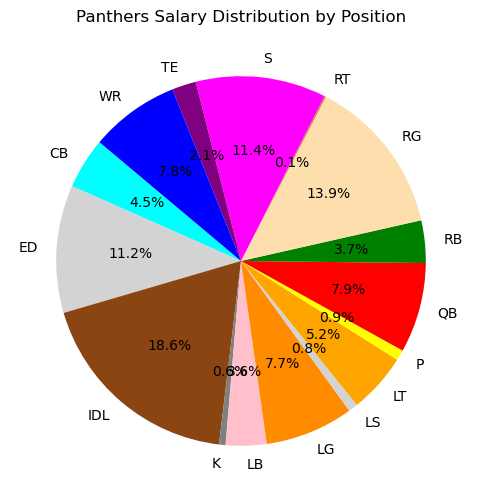

In [86]:
plt.figure(figsize=(6, 6))
plt.pie(
    panthers_salary_by_position,
    labels=panthers_salary_by_position.index,
    colors=[position_colors.get(pos, "lightgray") for pos in panthers_salary_by_position.index],
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Panthers Salary Distribution by Position")
plt.show()

In [88]:
nfl_salary_by_position = active_contracts.groupby("position")["apy"].sum()

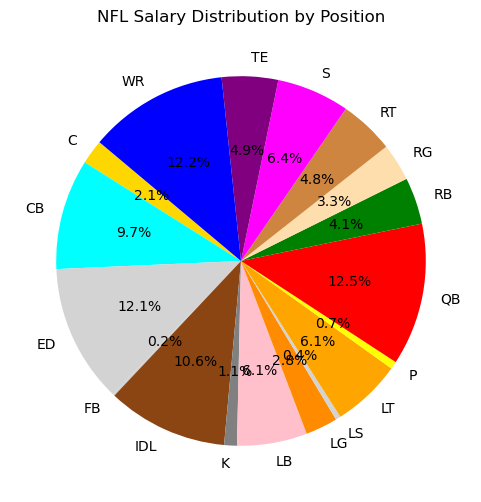

In [89]:
plt.figure(figsize=(6, 6))
plt.pie(
    nfl_salary_by_position,
    labels=nfl_salary_by_position.index,
    colors=[position_colors.get(pos, "lightgray") for pos in nfl_salary_by_position.index],
    autopct="%1.1f%%",
    startangle=140
)
plt.title("NFL Salary Distribution by Position")
plt.show()

In [91]:
db[db["player"] == "Taylor Moton"]

,player,position,team,is_active,year_signed,years,value,apy,guaranteed,apy_cap_pct,...,gsis_id,date_of_birth,height,weight,college,draft_year,draft_round,draft_overall,draft_team,cols
22328,Taylor Moton,RT,Panthers,True,2021,5.0,85.00000,17.000000,43.000000,0.093,...,00-0033284,NaN,"6'5""",319.0,Western Michigan,2017.0,2.0,64.0,Panthers,NaN
22618,Taylor Moton,RT,Panthers,False,2017,4.0,4.15815,1.039538,1.877633,0.006,...,00-0033284,NaN,"6'5""",319.0,Western Michigan,2017.0,2.0,64.0,Panthers,NaN
